## **Author name- Amit Kumar Yadav**
# **Project name- Car price prediction**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
#getting some information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
#checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
#checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the categorical data

In [9]:
df.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
df.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
df.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)




In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting data into dependent and independent feature

In [12]:
X=df.drop(["Car_Name","Selling_Price"],axis=1)
y=df["Selling_Price"]

In [13]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [14]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [15]:
print(X.shape),print(y.shape)

(301, 7)
(301,)


(None, None)

# Splitting data into training and test data

In [18]:
from sklearn.model_selection import train_test_split


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

# Model training

In [20]:
#LINEAR MODEL
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Model Evaluation

In [23]:
#prediction on training data
training_pred=lr.predict(X_train)

In [30]:
#Checking R-squarred error
from sklearn import metrics


In [31]:
error= metrics.r2_score(y_train,training_pred)
print("r2 error :",error)

r2 error : 0.8799451660493711


# Visualize the actual price and predicted price

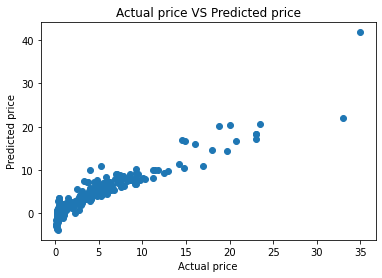

In [33]:
plt.scatter(y_train,training_pred)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual price VS Predicted price")
plt.show()

In [35]:
#prediction on test data
test_prediction=lr.predict(X_test)

In [36]:
error= metrics.r2_score(y_test,test_prediction)
print("r2 error :",error)

r2 error : 0.8365766715027051


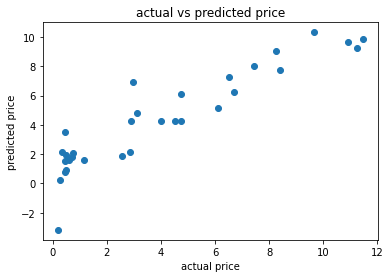

In [37]:
plt.scatter(y_test,test_prediction)
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("actual vs predicted price")
plt.show()